In [98]:
from nltk.stem import WordNetLemmatizer 
import gensim
import numpy as np
import nltk
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
import re
import numpy as np
import pandas as pd
import collections


In [24]:
tokenizer = ToktokTokenizer()
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopword_list = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer() 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sismc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sismc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sismc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [11]:
path = '..\data'
df = pd.read_parquet(path+'\\data_scientist_merged_01_09_2019.parquet')

In [12]:
df.head()

,closing,company,contract_time,contract_type,description,disability_confident,id,isco_code,location,postcode,posted,salary,salary_base,salary_info,title,url
0,2019-05-12T15:02:30,Hays Specialist Recruitment,full_time,permanent,"Data Scientist - Python, Machine Learning, Clo...",None,2038758,2,"Bromley, Kent, BR11DP",BR11DP,2019-04-12T15:02:30,"£55,000.00 to £65,000.00 per year",None,None,Data Scientist,https://findajob.dwp.gov.uk/details/2038758?ut...
1,2019-05-10T10:42:14,Technojobs,full_time,permanent,"Data Scientist Salary £55,788 to £59,297 (depe...",None,2016089,2,London,None,2019-04-10T10:42:14,,None,None,Data Scientist,https://findajob.dwp.gov.uk/details/2016089?ut...
2,2019-05-24T16:08:28,Hays Specialist Recruitment,full_time,permanent,Data Scientists Required - Machine Learning - ...,None,2100528,2,"Bristol, Bristol, BS1 6QF",None,2019-04-24T16:08:28,"£40,000.00 to £60,000.00 per year",None,None,Data Science,https://findajob.dwp.gov.uk/details/2100528?ut...
3,2019-05-26T16:20:12,Hays Specialist Recruitment,full_time,permanent,Data Scientist - Global Insurance Company - Py...,None,2116840,2,"London, London, ec3m 3bd",ec3m3bd,2019-04-26T16:20:12,"£65,000.00 to £75,000.00 per year",None,None,Data Scientist,https://findajob.dwp.gov.uk/details/2116840?ut...
4,2019-05-17T21:47:39,Jet2 com,full_time,permanent,"Reporting to the General Manager, Data Science...",None,2072968,2,"Leeds, West Yorkshire, LS11 9AW",LS119AW,2019-04-17T21:47:39,,None,None,Data Scientist,https://findajob.dwp.gov.uk/details/2072968?ut...


In [13]:
df.shape

(2129, 16)

In [14]:
df.posted.max()

'2019-10-05T02:03:56'

In [15]:
df_sub = df[['id','description']]

##### The Most Frequently Occuring Words

In [36]:
def remove_stopwords(text, is_lower_case=False):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, ", ",text)
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [57]:

def lemmat(text):
    list_ = []
    for word in text.split():
        #print(word)
        list_.append(lemmatizer.lemmatize(word.lower()))
        #print(list_)
    return list_
   

In [58]:
df_sub['desc_0'] = df_sub.apply(lambda x: remove_stopwords(x['description']),axis=1)


C:\Users\sismc\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
df_sub.head()

,id,description,desc_0,desc_1
0,2038758,"Data Scientist - Python, Machine Learning, Clo...","Data Scientist , Python , Machine Learning , C...","[Data, Scientist, ,, Python, ,, Machine, Learn..."
1,2016089,"Data Scientist Salary £55,788 to £59,297 (depe...","Data Scientist Salary , 55 , 788 , 59 , 297 , ...","[Data, Scientist, Salary, ,, 55, ,, 788, ,, 59..."
2,2100528,Data Scientists Required - Machine Learning - ...,"Data Scientists Required , Machine Learning , ...","[Data, Scientists, Required, ,, Machine, Learn..."
3,2116840,Data Scientist - Global Insurance Company - Py...,"Data Scientist , Global Insurance Company , Py...","[Data, Scientist, ,, Global, Insurance, Compan..."
4,2072968,"Reporting to the General Manager, Data Science...","Reporting General Manager , Data Science Data ...","[Reporting, General, Manager, ,, Data, Science..."


In [60]:
df_sub['desc_1'] = df_sub.apply(lambda x: lemmat(x['desc_0']),axis=1)

C:\Users\sismc\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
df_sub.head()

,id,description,desc_0,desc_1
0,2038758,"Data Scientist - Python, Machine Learning, Clo...","Data Scientist , Python , Machine Learning , C...","[data, scientist, ,, python, ,, machine, learn..."
1,2016089,"Data Scientist Salary £55,788 to £59,297 (depe...","Data Scientist Salary , 55 , 788 , 59 , 297 , ...","[data, scientist, salary, ,, 55, ,, 788, ,, 59..."
2,2100528,Data Scientists Required - Machine Learning - ...,"Data Scientists Required , Machine Learning , ...","[data, scientist, required, ,, machine, learni..."
3,2116840,Data Scientist - Global Insurance Company - Py...,"Data Scientist , Global Insurance Company , Py...","[data, scientist, ,, global, insurance, compan..."
4,2072968,"Reporting to the General Manager, Data Science...","Reporting General Manager , Data Science Data ...","[reporting, general, manager, ,, data, science..."


##### get unique words per add

In [64]:
def get_unique(text):
    return np.unique(text)

In [65]:
df_sub['desc_2'] = df_sub.apply(lambda x: get_unique(x['desc_1']),axis=1)

C:\Users\sismc\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


###### Merge words into single body

In [85]:
df_sub2 = df_sub.drop_duplicates('id')
df_sub2.shape

(1875, 5)

In [87]:
id = df_sub2.id.unique()[0]
df_sub2[df_sub2.id==id]

,id,description,desc_0,desc_1,desc_2
0,2038758,"Data Scientist - Python, Machine Learning, Clo...","Data Scientist , Python , Machine Learning , C...","[data, scientist, ,, python, ,, machine, learn...","[,, 02034650094, 250, accept, across, act, age..."


In [95]:
m=0
corpora = []
for n in df_sub2.desc_2:
    for word in n:
        corpora.append(word)    

In [97]:
len(corpora)

400984

In [99]:
word_counter = collections.Counter(corpora)

In [110]:
word_counter.most_common(750)

[(',', 1875),
 ('data', 1873),
 ('experience', 1639),
 ('team', 1580),
 ('work', 1566),
 ('science', 1557),
 ('skill', 1450),
 ('working', 1434),
 ('role', 1344),
 ('development', 1251),
 ('new', 1220),
 ('project', 1173),
 ('opportunity', 1128),
 ('business', 1106),
 ('application', 1069),
 ('support', 1059),
 ('knowledge', 1056),
 ('within', 1054),
 ('including', 1026),
 ('date', 1004),
 ('technology', 997),
 ('develop', 983),
 ('strong', 953),
 ('uk', 946),
 ('environment', 928),
 ('ability', 922),
 ('part', 921),
 ('time', 909),
 ('across', 906),
 ('based', 897),
 ('analysis', 897),
 ('learning', 883),
 ('service', 875),
 ('looking', 866),
 ('scientist', 861),
 ('2019', 858),
 ('management', 857),
 ('salary', 855),
 ('help', 835),
 ('using', 835),
 ('apply', 819),
 ('research', 819),
 ('product', 818),
 ('responsibility', 818),
 ('solution', 816),
 ('need', 802),
 ('system', 798),
 ('level', 796),
 ('company', 791),
 ('also', 790),
 ('well', 786),
 ('technical', 783),
 ('communicat

In [111]:
langs_=[('python', 781),('r', 539),('sql', 485),('c', 414),('java', 250),('spark', 192),('hadoop', 173),('excel', 130),('javascript', 130),('linux', 130)]

In [136]:
df_lang = pd.DataFrame(langs_)
df_lang.columns =['language','count']
def perc_(num):
    return 100*num/len(df_sub2)
df_lang['percentage_occur']=df_lang['count'].apply(perc_)
df_lang

,language,count,percentage_occur
0,python,781,41.653333
1,r,539,28.746667
2,sql,485,25.866667
3,c,414,22.080000
4,java,250,13.333333
5,spark,192,10.240000
6,hadoop,173,9.226667
7,excel,130,6.933333
8,javascript,130,6.933333
9,linux,130,6.933333


In [143]:
1875*0.06

112.5

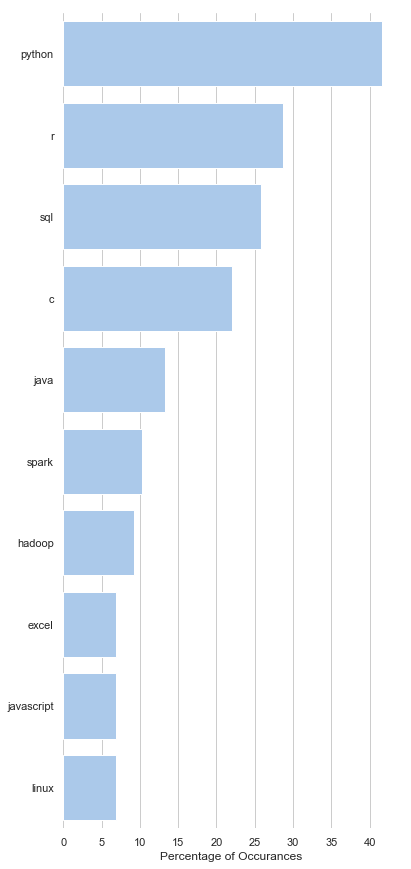

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")
%matplotlib inline
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset


# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(y="language", x="percentage_occur", data=df_lang,
            label="Total", color="b")

ax.set( ylabel="",
       xlabel="Percentage of Occurances")
sns.despine(left=True, bottom=True)

##### Phrase Frequencies

In [ ]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

# change this to read in your data
finder = BigramCollocationFinder.from_words(
    nltk.corpus.genesis.words('english-web.txt'))

# only bigrams that appear 3+ times
finder.apply_freq_filter(3)

# return the 10 n-grams with the highest PMI
finder.nbest(bigram_measures.pmi, 10)

In [34]:
from nltk import ngrams

sentence = 'this is a foo bar sentences and i want to ngramize it'

n = 3
sixgrams = ngrams(sentence.split(), n)

for grams in sixgrams:
  print (grams)

('this', 'is', 'a')
('is', 'a', 'foo')
('a', 'foo', 'bar')
('foo', 'bar', 'sentences')
('bar', 'sentences', 'and')
('sentences', 'and', 'i')
('and', 'i', 'want')
('i', 'want', 'to')
('want', 'to', 'ngramize')
('to', 'ngramize', 'it')
